<a href="https://colab.research.google.com/github/salmaaa9/orbitPolynomialRegression/blob/main/orbitPolynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [11]:

# Load and preprocess dataset
data = pd.read_csv('orbit.csv')

X = data[['time_steps']].values  # Feature: Time
y = data['y'].values  # Target: Position

In [12]:
# Polynomial Features: Add time squared for a quadratic regression
X_poly = np.hstack((X, X**2))

Split the data and Normalize

In [13]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Building a simple neural Network

In [14]:
# Build a simple neural network
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))  # Input layer + first hidden layer
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(1))  # Output layer for predicting position

# Compile the model
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train and Predict

In [15]:

# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

# Make predictions
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)


Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1937.8823 - val_loss: 1716.5745
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1933.3298 - val_loss: 1417.3673
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1523.1605 - val_loss: 858.8073
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 738.6572 - val_loss: 239.9297
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 170.7042 - val_loss: 27.9684
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21.2786 - val_loss: 6.5681
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8778 - val_loss: 1.8139
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.5974 - val_loss: 0.8115
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.8237 - val_loss: 0.5255
Epoch 10/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5134 - val_loss: 0.3736
Epoch 11/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3811 - val_loss: 0.2802
Epoch 12/100
40/40 ━━━━━━━━━━━━━━━━━━━

Evaluation

In [16]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"MSE: {mse}, MAE: {mae}, R-squared: {r2}")


MSE: 0.0002840344476815505, MAE: 0.012816763373574416, R-squared: 0.9999996566169039


Plot

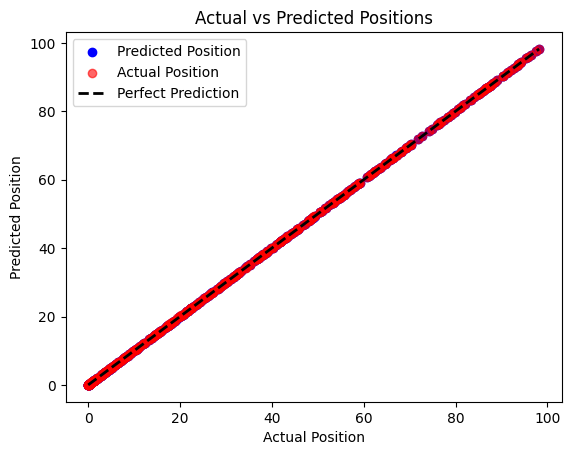

In [17]:
# Plot Actual vs Predicted Positions
plt.scatter(y_test, y_pred_test, color='blue', label='Predicted Position')
plt.scatter(y_test, y_test, color='red', label='Actual Position', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Position')
plt.ylabel('Predicted Position')
plt.title('Actual vs Predicted Positions')
plt.legend()
plt.show()